In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("Iris.csv")

In [3]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y = data["Species"]

In [5]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [6]:
encoder = LabelEncoder() 
y= encoder.fit_transform(data['Species'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
print(f"Linear Regression MSE: {linear_mse}")
linear_pred = linear_reg.predict(X_test).round().astype(int)
linear_accuracy = accuracy_score(y_test, linear_pred)
print(f"Linear Regression Accuracy: {linear_accuracy}")

Linear Regression MSE: 0.037233644561975004
Linear Regression Accuracy: 1.0


In [9]:
ridge_reg = Ridge(alpha=1.0) 
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print(f"Ridge Regression MSE: {ridge_mse}")
ridge_pred = ridge_reg.predict(X_test).round().astype(int)
ridge_accuracy = accuracy_score(y_test, ridge_pred)
print(f"Ridge Regression Accuracy: {ridge_accuracy}")

Ridge Regression MSE: 0.037384587651605725
Ridge Regression Accuracy: 1.0


In [10]:



lasso_reg = Lasso(alpha=1.0) 
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print(f"Lasso Regression MSE: {lasso_mse}")
lasso_pred = lasso_reg.predict(X_test).round().astype(int)
lasso_accuracy = accuracy_score(y_test, lasso_pred)
print(f"Lasso Regression Accuracy: {lasso_accuracy}")

Lasso Regression MSE: 0.7006249999999998
Lasso Regression Accuracy: 0.3


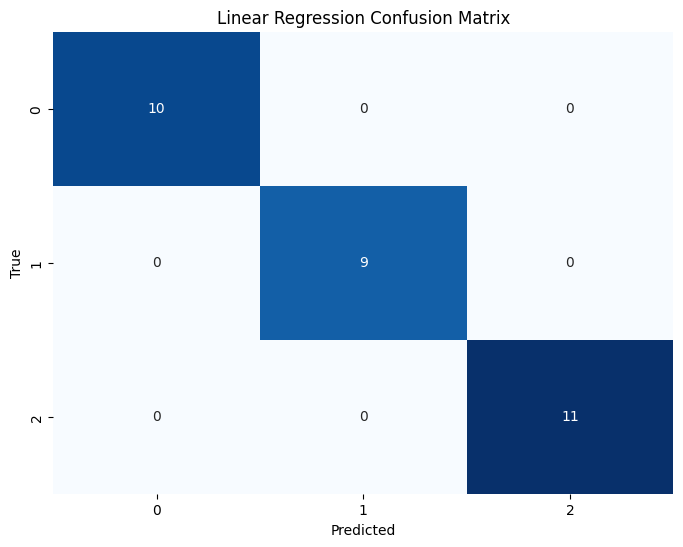

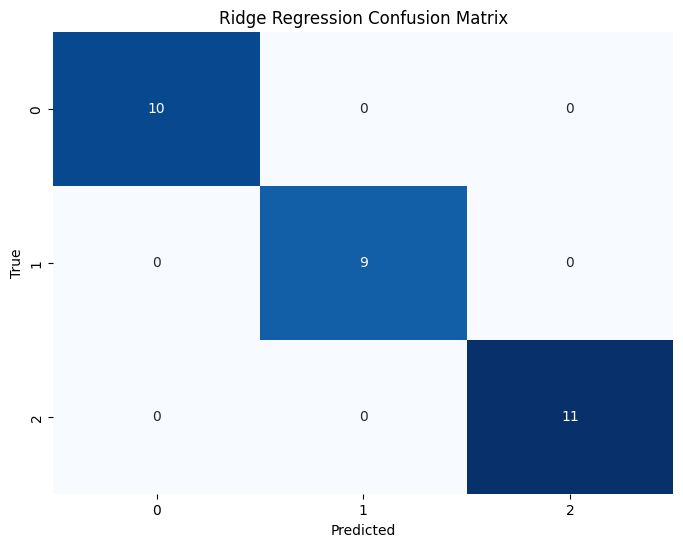

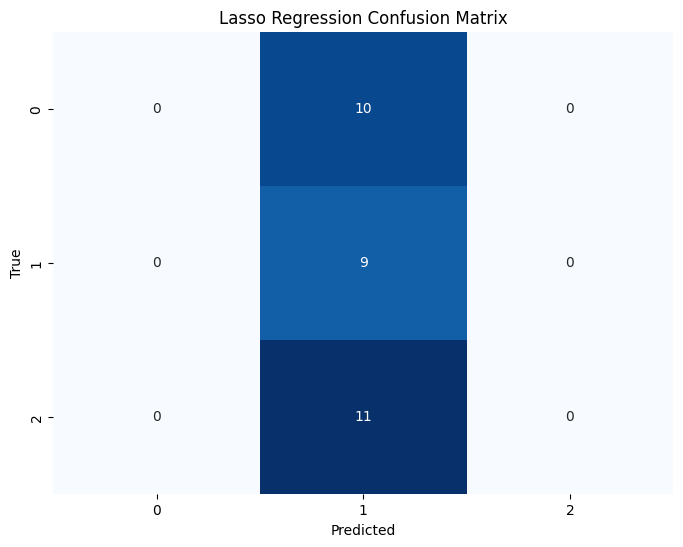

In [122]:
def plot_confusion_matrix(model, X, y_true, title):
    y_pred = model.predict(X).round().astype(int)
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
plot_confusion_matrix(linear_reg, X_test, y_test, 'Linear Regression Confusion Matrix')
plot_confusion_matrix(ridge_reg, X_test, y_test, 'Ridge Regression Confusion Matrix')
plot_confusion_matrix(lasso_reg, X_test, y_test, 'Lasso Regression Confusion Matrix')
